# Overview

We're now switching focus away from the Network Science, beginning to think about _Text_ instead. In other words, today will be all about learning to parse and make sense of textual data. This ties in nicely with our work on the network of Computational Social Scientists, because papers naturally contain text.

We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Part 1 - Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Part 2 -  Figuring out how to make NLTK to work with real world data (Chapter 3).
* Part 3 - Apply some of the concepts that you have learned to study the abstract dataset

> **_Video Lecture_**. [Intro to Natural Language processing](https://www.youtube.com/watch?v=Ph0EHmFT3n4). Today is all about working with NLTK, so not much lecturing - we will start with a perspective on text analysis by Sune (you will hear him talking about Wikipedia data here and there. Everything he sais applies to other textual data as well!)

#  Part 1 : Installing and the basics

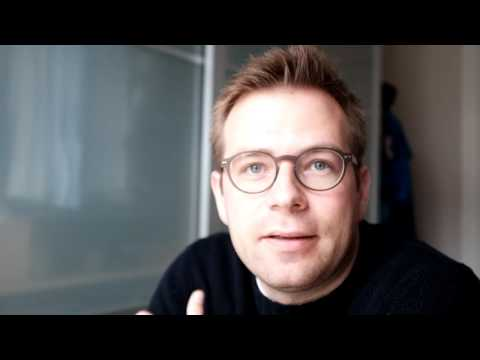

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ph0EHmFT3n4",width=800, height=450)


> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1, Sections 1, 2, 3\. [It's free online](http://www.nltk.org/book/). 


> *Exercises*: NLPP Chapter 1\.
> 
> * First, install `nltk` if it isn't installed already.
> * Second, work through chapter 1. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open IPython Notebook and type out the examples that you see. ***It becomes much more fun if you to add a few variations and see what happens***. Some of those examples might very well be due as assignments, so those ones should definitely be in a `notebook`. 
>     * The following exercises from Chapter 1 are what might be due in an assignment later on.
>     * Try out the `concordance` method, using another text and a word of your own choosing.
>     * Also try out the `similar` and `common_context` methods for a few of your own examples.
>     * Create your own version of a dispersion plot ("your own version" means another text and different word).
>     * Explain in your own words what aspect of language _lexical diversity_ describes. 


In [6]:
#!pip install nltk
#import nltk
#nltk.download('gutenberg')
# Load a text from the book package
#text1


# Search for a word in the text
# text2.concordance("period")



# Search for a similiar word in the text
#text2.similar("period")


#Find common context of two words
#text2.common_contexts(["period", "time"])


#Dispersion plot
#text2.dispersion_plot(["period", "time", "life", "love", "death", "hate", "war", "peace", "freedom", "justice", "power", "money", "happiness", "sadness", "anger", "fear", "hope", "faith", "truth", "lie", "good", "evil", "right", "wrong", "beautiful", "ugly", "rich", "poor", "smart", "stupid", "wise", "foolish", "brave", "coward", "strong", "weak", "healthy", "sick", "young", "old"])

#Lexical Diversity
#print("As the term denotes, lexical diversity is a measure of diversity of the words in the text. Therefore the term describes the vocabulary of a language.") 

# Part 2 - Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about.
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

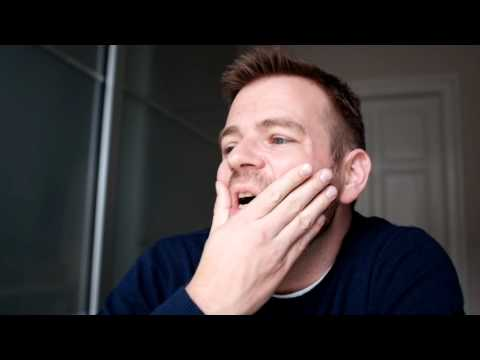

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key thing is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation on  topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).


# Part 3 - Putting things into practice with the abstract dataset


## Prelude to Exercise 1: Some theory on the Zipf's law. 


**Zipf's Law:** Let $f(w)$ be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. The [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type. 


> _Reading_
> Skim through the Wikipedia page on the [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law)

> __Exercise 1: Tokenization and Zipf's Law.__ In this exercise, you will explore tokenization and its relation to Zipf's Law through the abstracts of Computational Social Science papers. Starting with your abstracts dataframe from Week 2, follow the steps below to analyze and process the data.
>
> 1. __Convert Inverted Index to Text.__ Write a function that converts an inverted indexed abstract into plain text. Then, use the [`pd.apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) method to apply your function to each row in your dataframe, storing the output in a new column named `text`.
>
> 2. __Tokenization.__ Create a column `tokens` in your dataframe to store the tokens from each abstract's text. Remember to adhere to the following guidelines for successful tokenization:
>  - Revisit Chapter 3 if you're unfamiliar with tokenization.
>  - Exclude punctuation, URLs, mathematical symbols, and numbers.
>  - Convert all text to lowercase.
>  - Optional: Consider using stemming.
>  
> 3. __Create a Tokens List.__ Combine the tokens from all abstracts into one comprehensive list.
>
> 4. __Common words.__ Determine and list the 10 most frequent words within your concatenated tokens list.
>
> 5. __Frequency rank plot.__ Write a function to process your list of tokens and plot word frequency against word rank. Use a logarithmic scale for your plot. Reflect on the trend observed, especially at the extremes of the plotted line.
> 6. __Comparison with random words.__ 
>  - Generate a long, random text string using `random.choice("abcdefg ")`, including the space character.
>  - Tokenize this string and generate a Zipf plot, comparing it with your earlier plot.
>  - Share your insights on Zipf's Law based on this comparison.
> 7. __Excluding Stopwords.__
>  - Exclude stopwords from your tokens (review NLPP1e if necessary).
>  - Repeat Steps 2 to 5 with the refined tokens list.
>  - Observe and describe any changes in your findings.


In [8]:
# Load dependencies
#!pip install pandas
import pandas as pd
import ast
from nltk import word_tokenize
# 1 Convert Inverted Index to Text

# Load the data
df = pd.read_csv("final_abstracts.csv")


def write_text_from_inverted_indices(dictionary):
    if pd.isna(dictionary):
        return ""
    dictionary = ast.literal_eval(dictionary)
    sorted_words = sorted(dictionary.keys(), key=lambda word: min(dictionary[word]))
    text = ' '.join(sorted_words)
    return text

df['text'] = df['abstract_inverted_index'].apply(write_text_from_inverted_indices)

In [9]:
import nltk


from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re


# 2

#Create a function that tokenize the text as specified in the exercise

def tokenize_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\d+', '', text)
    
    text = text.lower()
    
    tokens = word_tokenize(text)

    return tokens
   
# Apply the function to the dataframe and save the result in a new column
df['tokens'] = df['text'].apply(tokenize_text)


In [10]:
# 3

combined_tokens = []

# Iterate over each row in the dataframe
for _ , row in df.iterrows():
    combined_tokens.extend(row['tokens'])

# Print the combined tokens
print(len(combined_tokens))


15147728


In [11]:
from nltk.probability import FreqDist
# 4

freq_dist = FreqDist(combined_tokens)

# Get the 10 most common words
most_common_words = freq_dist.most_common(10)

# Print the most common words
for word, frequency in most_common_words:
    print(word, frequency)


the 215204
in 180320
a 151318
to 144256
and 137602
of 136227
this 123171
we 122784
that 112398
for 111536


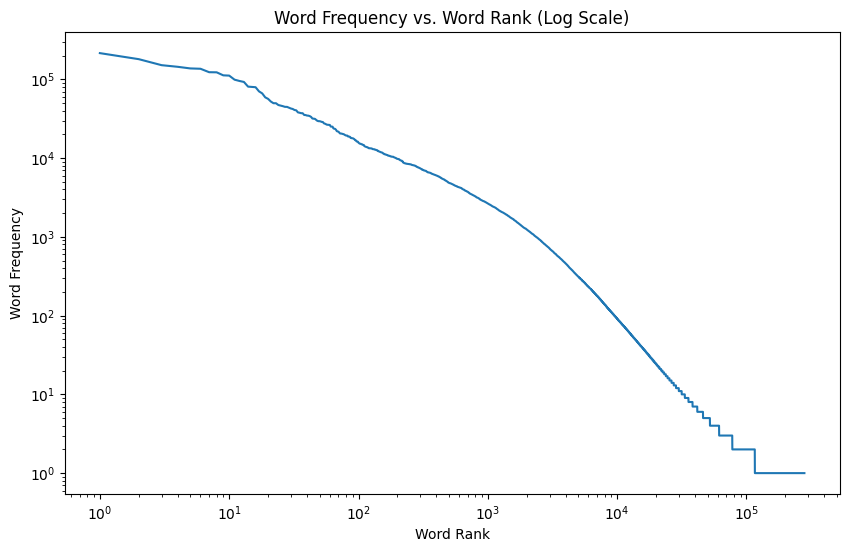

In [12]:
import numpy as np
# 5
import matplotlib.pyplot as plt
def plot_word_frequency(tokens):
    freq_dist = FreqDist(tokens)
    word_ranks = list(range(1, len(freq_dist) + 1))
    word_frequencies = [freq_dist[word] for word in freq_dist]
    
    plt.figure(figsize=(10, 6))
    plt.plot(word_ranks, word_frequencies)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Word Rank')
    plt.ylabel('Word Frequency')
    plt.title('Word Frequency vs. Word Rank (Log Scale)')
    plt.show()

# Call the function with the combined tokens
plot_word_frequency(combined_tokens)


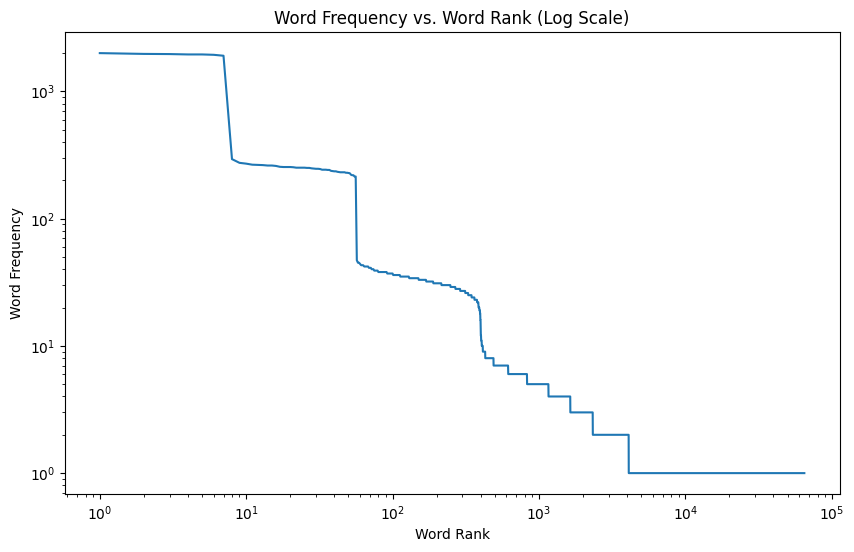

In [13]:
import random
# 6
# Generate a long random text string
random_text = ''.join(random.choice("abcdefg ") for _ in range(1000000))

# Tokenize the random text string
random_tokens = tokenize_text(random_text)

plot_word_frequency(random_tokens)


['hasn', 'how', "doesn't", "couldn't", 'these', 'mustn', 'didn', "needn't", 'weren', 'by']
Most common words (excluding stopwords):
results: 49744
data: 45642
study: 44738
using: 38058
model: 37674
paper: 35299
research: 35175
also: 34678
two: 31802
information: 30585


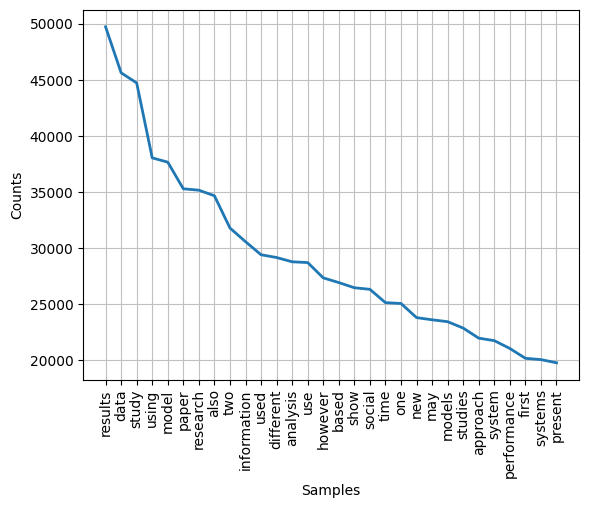

In [14]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import re


stopwords_set = set(stopwords.words('english'))

print(list(stopwords_set)[:10])


def tokenize_text_wo_stopwords(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()  # Convert to lowercase
    
    tokens = word_tokenize(text)  # Tokenize the text
    
    refined_tokens = [token for token in tokens if token not in stopwords_set]

    
    
    return refined_tokens

df['tokens_refined'] = df['text'].apply(tokenize_text_wo_stopwords)

combined_tokens_refined = [token for tokens_list in df['tokens_refined'] for token in tokens_list]

freq_dist_refined = FreqDist(combined_tokens_refined)

most_common_words_refined = freq_dist_refined.most_common(10)

print("Most common words (excluding stopwords):")
for word, frequency in most_common_words_refined:
    print(f"{word}: {frequency}")

import matplotlib.pyplot as plt

freq_dist_refined.plot(30, cumulative=False) 
plt.show()


## Prelude to Exercise 2: Some theory on bigrams and contingency tables .

In this course, we use a "bag-of-words" approach, beucause using simple methods to explore the data is veru important before applying any complex model. 
Here, we learn how to account for an issue that often comes up when using a bag-of-words approach when studying textual data. 
[*Collocations*](https://en.wikipedia.org/wiki/Collocation), are *pairs of words that tend to appear together more often than by chance*. It is an important concept in linguistics. 

In the case of collocations, words should be considered together to retain their original meaning (e.g. *machine learning* is not simply *machine* and *learning*. The same applies to *computer science*, *social media*, *computational social science* ).

**How do we find out if a pair of words $w_1, w_2$ appears in a corpus more often than one would expect by chance?** We study the corresponding *contingency table*.
Given a corpus, and two words $w_1$ and $w_2$, the observerd contingency table is a matrix with the following elements:

$$O_{w_1,w_2}= \begin{bmatrix} n_{ii} & n_{io} \\ n_{oi} & n_{oo} \end{bmatrix}$$

$n_{ii}$: the number of times the bigram ($w_1$, $w_2$) appear in the corpus     
$n_{io}$: the number of bigrams ($w_1$, * ), where the first element is $w_1$ and the second element is **not** $w_2$         
$n_{oi}$:  the number of bigrams ( * , $w_2$ ), where the first element is **not** $w_1$ and the second element is $w_2$    
$n_{oo}$: the number of bigrams ( * , * ) where the first element is **not** $w_1$ and the second is **not** $w_2$. 

Then, we can compare the observed number of occurrences of the bigram, $n_{ii}$, with the number of occurrences we would expect simply by random chance.    

If we define: 

$R_{1}=n_{ii}+n_{io}$: the bigrams containing the word $w_1$  (sum of first row)    
$C_{1}=n_{ii}+n_{oi}$: the bigrams containing the word $w_2$ (sum of first column)    
$R_{2}=n_{oi}+n_{oo}$: the bigrams **not** containing the word $w_1$  (sum of second row)    
$C_{2}=n_{io}+n_{oo}$: the bigrams **not** containing the word $w_2$  (sum of second column)    
$N = R_1 + C_1 + R_2 + C_2$: the total number of bigrams

Then, the matrix of expected values is: 

$$E_{w_1,w_2}= \begin{bmatrix} \frac{R_1C_1}{N} & \frac{R_1C_2}{N} \\ \frac{R_2C_1}{N} & \frac{R_2C_2}{N} \end{bmatrix}$$


We can then check if our bigram ${w_1,w_2}$ appears more than what we would expect by chance by comparing how similar are the values of $O_{w_1,w_2}$ and $E_{w_1,w_2}$. 
A common choice to do that is to use a [Chi-Squared test](https://en.wikipedia.org/wiki/Chi-squared_test).


> **Exercise 2: Bigrams and contingency tables**. 
> 1. Find the list of bigrams in each of the abstracts. If you don't remember how to do it, go back to [Chapter 1](http://www.nltk.org/book/) of your book. Store all the bigrams in a single list. __Important__: here you shall work with the clean set of tokens you have generated in the exercise above (after removing punctuation, **stopwords**, digits, math symbols, etc).    
>    
> 2. For each unique bigram in your list:
>   - compute the corresponding *contingency table* (see the theory just above)
>   - compute the expected *contingency table* (see the theory just above) 
>
> 3. For each unique bigram, compute the Chi-squared statistics: $X^2 = \sum_{ij}\frac{(O_{ij} - E_{ij})^2}{E_{ij}}$, where $O_{ij}$ and $E_{ij}$ are the elements of the observed and expected matrix, respectively. 
> 4. Compute the p-value associated to each Chi-squared statistics. The p-value is nothing but the survival function (1 - cumulative distribution function) of the [Chi-squared distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html). Hence, you can simply compute it as: ``scipy.stats.chi2.sf(X^2,df=1)`` because in this case we have 1 degree of freedom (df=1).  
> 5. Find the list of bigrams that appear more than 50 times and have p-value smaller than 0.001. We refer to those as __collocations__. 
> 6. How many collocations have you found? Print out the top 20 of them. What do you observe? What kind of bigrams does this list include? 
> 7. Recompute the __tokens__ column in your dataframe. This time, do not split pairs of words that constitute a collocation (from now on we consider those two words as a single "token"). **Hint:** You can use the [MWETokenizer](https://www.nltk.org/_modules/nltk/tokenize/mwe.html). 
> 8. Save your abstract dataframe with the new __tokens__ column.

In [15]:
# 1 finding bigrams in each abstract
from nltk import bigrams


df['bigrams'] = df['tokens_refined'].apply(lambda tokens: list(bigrams(tokens)))


print(df[['bigrams']].head())


                                             bigrams
0  [(recent, years), (years, many), (many, accura...
1  [(chapter, presents), (presents, integrated), ...
2  [(user, generated), (generated, content), (con...
3  [(equation, prejudice), (prejudice, antipathy)...
4                                                 []


In [16]:
# 2 combining all bigrams to single list

all_bigrams = [bigram for bigrams_list in df['bigrams'] for bigram in bigrams_list]

print(f"Total bigrams: {len(all_bigrams)}")
print(all_bigrams[:10])


Total bigrams: 11359542
[('recent', 'years'), ('years', 'many'), ('many', 'accurate'), ('accurate', 'decision'), ('decision', 'support'), ('support', 'systems'), ('systems', 'constructed'), ('constructed', 'black'), ('black', 'boxes'), ('boxes', 'hide')]


In [17]:
# 3 computing contigency tables
from collections import Counter

# Count occurrences of all bigrams
bigram_counts = Counter(all_bigrams)

word_counts = Counter([word for tokens in df['tokens_refined'] for word in tokens])

N = sum(bigram_counts.values())

# Print a summary of counts
print(f"Total unique bigrams: {len(bigram_counts)}")
print(f"Total unique words: {len(word_counts)}")
print(f"Total bigrams (N): {N}")


Total unique bigrams: 5646747
Total unique words: 280484
Total bigrams (N): 11359542


In [18]:
from collections import Counter
start_bigram_counts = Counter()
end_bigram_counts = Counter()

for bigram, count in bigram_counts.items():
    start_bigram_counts[bigram[0]] += count
    end_bigram_counts[bigram[1]] += count

contingency_tables = {}

for bigram, n_ii in bigram_counts.items():
    w1, w2 = bigram
    R1 = start_bigram_counts[w1]  
    C1 = end_bigram_counts[w2]    
    R2 = N - R1                    
    C2 = N - C1                    
    n_io = R1 - n_ii  
    n_oi = C1 - n_ii  
    n_oo = N - (n_ii + n_io + n_oi) 
    O = [[n_ii, n_io], [n_oi, n_oo]]
    E = [[0, 0], [0, 0]] if N == 0 else [[(R1 * C1) / N, (R1 * C2) / N], [(R2 * C1) / N, (R2 * C2) / N]]

    contingency_tables[bigram] = {'O': O, 'E': E}

for bigram, tables in list(contingency_tables.items())[:5]:
    print(f"Bigram: {bigram}\nObserved:\n{tables['O']}\nExpected:\n{tables['E']}\n")


Bigram: ('recent', 'years')
Observed:
[[1933, 10136], [9686, 11337787]]
Expected:
[[12.344662399241097, 12056.65533760076], [11606.65533760076, 11335866.3446624]]

Bigram: ('years', 'many')
Observed:
[[70, 11510], [14322, 11333640]]
Expected:
[[14.671309811610362, 11565.32869018839], [14377.32869018839, 11333584.671309812]]

Bigram: ('many', 'accurate')
Observed:
[[2, 15673], [3758, 11340109]]
Expected:
[[5.188413406103873, 15669.811586593896], [3754.811586593896, 11340112.188413406]]

Bigram: ('accurate', 'decision')
Observed:
[[3, 3828], [6874, 11348837]]
Expected:
[[2.3192648964192393, 3828.680735103581], [6874.68073510358, 11348836.319264896]]

Bigram: ('decision', 'support')
Observed:
[[363, 6565], [13590, 11339024]]
Expected:
[[8.509707873785757, 6919.490292126215], [13944.490292126215, 11338669.509707874]]



In [19]:
# 5 computing Chi-squared statistics and p-values

from scipy.stats import chi2

chi_squared_stats = {}

for bigram, tables in contingency_tables.items():
    O = tables['O']
    E = tables['E']
    chi_squared = sum((O[i][j] - E[i][j]) ** 2 / E[i][j] for i in range(2) for j in range(2))
    p_value = chi2.sf(chi_squared, df=1)
    chi_squared_stats[bigram] = {'chi_squared': chi_squared, 'p_value': p_value}


for bigram, stats in list(chi_squared_stats.items())[:5]:
    print(f"Bigram: {bigram}\nChi-squared: {stats['chi_squared']}\nP-value: {stats['p_value']}\n")


Bigram: ('recent', 'years')
Chi-squared: 299450.9964387082
P-value: 0.0

Bigram: ('years', 'many')
Chi-squared: 209.13437283584608
P-value: 2.1218903205999839e-47

Bigram: ('many', 'accurate')
Chi-squared: 1.9627191088271834
P-value: 0.1612228129898322

Bigram: ('accurate', 'decision')
Chi-squared: 0.19999329126016277
P-value: 0.6547262611741815

Bigram: ('decision', 'support')
Chi-squared: 14794.243606185699
P-value: 0.0



In [20]:
from nltk.tokenize import MWETokenizer, word_tokenize
# 6 Identity colloqatuions
collocations = {bigram: stats for bigram, stats in chi_squared_stats.items() if bigram_counts[bigram] > 50 and stats['p_value'] < 0.001}


print(f"Number of collocations: {len(collocations)}")
for bigram, stats in list(collocations.items())[:10]:
    print(f"Bigram: {bigram}\nChi-squared: {stats['chi_squared']}\nP-value: {stats['p_value']}\n")
collocations_list = list(collocations.keys())

mwetokenizer = MWETokenizer(collocations_list, separator=' ')


Number of collocations: 10338
Bigram: ('recent', 'years')
Chi-squared: 299450.9964387082
P-value: 0.0

Bigram: ('years', 'many')
Chi-squared: 209.13437283584608
P-value: 2.1218903205999839e-47

Bigram: ('decision', 'support')
Chi-squared: 14794.243606185699
P-value: 0.0

Bigram: ('support', 'systems')
Chi-squared: 476.12580990099696
P-value: 1.488558241743277e-105

Bigram: ('used', 'various')
Chi-squared: 107.80341233074287
P-value: 2.968049140511364e-25

Bigram: ('aim', 'article')
Chi-squared: 1591.247621784451
P-value: 0.0

Bigram: ('work', 'proposed')
Chi-squared: 38.63659662342718
P-value: 5.105264125510303e-10

Bigram: ('models', 'also')
Chi-squared: 111.6073086563724
P-value: 4.355789323563971e-26

Bigram: ('research', 'questions')
Chi-squared: 5003.089601450824
P-value: 0.0

Bigram: ('chapter', 'presents')
Chi-squared: 6387.677776005695
P-value: 0.0



In [21]:
top_collocations = sorted(collocations.items(), key=lambda x: x[1]['chi_squared'], reverse=True)[:20]
print(top_collocations)

[(('citationdownloadsmetricstotal', 'citationstotal'), {'chi_squared': 11359542.000000002, 'p_value': 0.0}), (('citationstotal', 'downloadslast'), {'chi_squared': 11359542.000000002, 'p_value': 0.0}), (('downloadslast', 'monthslast'), {'chi_squared': 11359542.000000002, 'p_value': 0.0}), (('bindersave', 'bindercreate'), {'chi_squared': 11359542.000000002, 'p_value': 0.0}), (('bindernamecancelcreateexport', 'citationpublisher'), {'chi_squared': 11359542.000000002, 'p_value': 0.0}), (('viewsaltmetriccitationslearn', 'metricsarticle'), {'chi_squared': 11359542.000000002, 'p_value': 0.0}), (('toview', 'inadd'), {'chi_squared': 11359542.000000002, 'p_value': 0.0}), (('exportriscitationcitation', 'abstractcitation'), {'chi_squared': 11359542.000000002, 'p_value': 0.0}), (('abstractcitation', 'referencesmore'), {'chi_squared': 11359542.000000002, 'p_value': 0.0}), (('onfacebooktwitterwechatlinked', 'inreddit'), {'chi_squared': 11359542.000000002, 'p_value': 0.0}), (('useshareable', 'linkuse')

In [23]:
import pandas as pd
import ast
from nltk.tokenize import MWETokenizer, word_tokenize
from nltk.corpus import stopwords
import string
from concurrent.futures import ThreadPoolExecutor
import re

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def inverted_index_to_text(inverted_index):
    if pd.isna(inverted_index):
        return ''
    try:
        inverted_index_dict = ast.literal_eval(inverted_index)
        sorted_words = sorted(inverted_index_dict.items(), key=lambda x: x[1][0])
        text = ' '.join(word for word, positions in sorted_words)
        return text
    except (ValueError, SyntaxError):
        return ''

def tokenize_text(text, tokenizer):
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text.lower())
    tokens = [re.sub(r"('s|’s|’)$", "", token) for token in tokens]
    tokens = [token for token in tokens if token not in stop_words and token.strip() and token != "'"]
    return tokenizer.tokenize(tokens)


def parallel_tokenize(texts, tokenizer):
    with ThreadPoolExecutor() as executor:
        result = list(executor.map(tokenize_text, texts, [tokenizer] * len(texts)))
    return result

def process_dataframe(df, input_column, tokenizer, output_column):
    df['text'] = df[input_column].apply(inverted_index_to_text)
    texts = df['text'].tolist()
    df[output_column] = parallel_tokenize(texts, tokenizer)
    return df


df = pd.read_csv('final_abstracts.csv')

mwetokenizer = MWETokenizer(collocations_list, separator=' ')

df = process_dataframe(df, 'abstract_inverted_index', mwetokenizer, 'tokens_with_collocations')

output_file_path = 'final_abstracts_with_collocations.csv'

df.to_csv(output_file_path, index=False)

print(f"DataFrame with updated tokens column saved to {output_file_path}")


DataFrame with updated tokens column saved to final_abstracts_with_collocations.csv
